In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
data = pd.read_csv('results.csv', names = ['year', 'LA', 'global'], skiprows=1 )
data.head()

,year,LA,global
0,1849,15.71,7.98
1,1850,15.28,7.90
2,1851,15.53,8.18
3,1852,15.61,8.10
4,1853,16.27,8.04


In [89]:
data['LA_ma5_temp'] = data['LA'].rolling(window=5).mean()
data['global_ma5_temp'] = data['global'].rolling(window=5).mean()
data.head(10)

,year,LA,global,LA_ma5_temp,global_ma5_temp
0,1849,15.71,7.98,NaN,NaN
1,1850,15.28,7.90,NaN,NaN
2,1851,15.53,8.18,NaN,NaN
3,1852,15.61,8.10,NaN,NaN
4,1853,16.27,8.04,15.680,8.040
5,1854,15.74,8.21,15.686,8.086
6,1855,15.94,8.11,15.818,8.128
7,1856,15.52,8.00,15.816,8.092
8,1857,16.19,7.76,15.932,8.024
9,1858,15.67,8.10,15.812,8.036


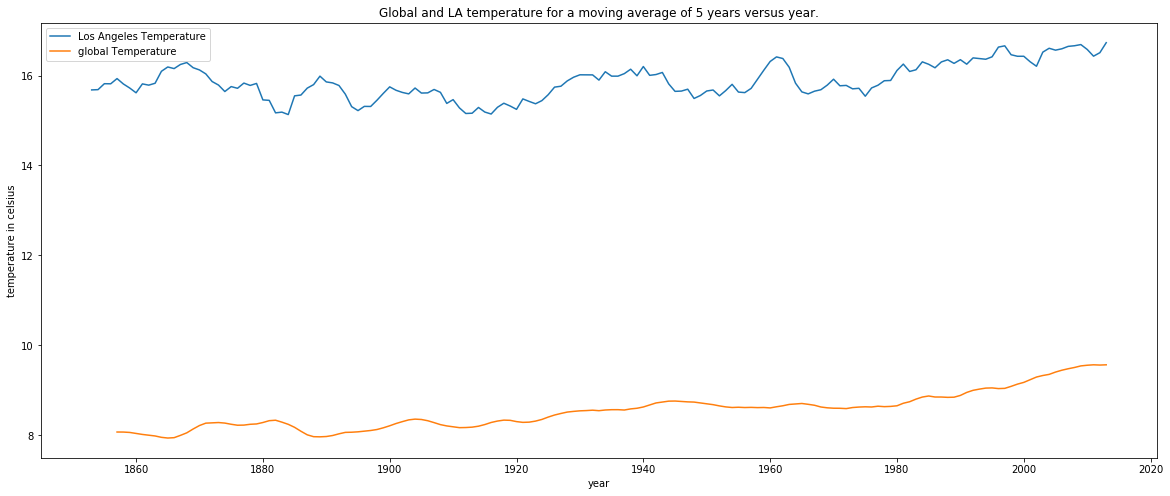

In [100]:
plt.figure(figsize=(20, 8))
plt.plot(data['year'], data['LA_ma5_temp'], label='Los Angeles Temperature')
plt.plot(data['year'], data['global_ma5_temp'].rolling(window=5).mean(), label='global Temperature')
plt.xlabel('year')
plt.ylabel('temperature in celsius')
plt.title('Global and LA temperature for a moving average of 5 years versus year.')
plt.legend()
plt.show();

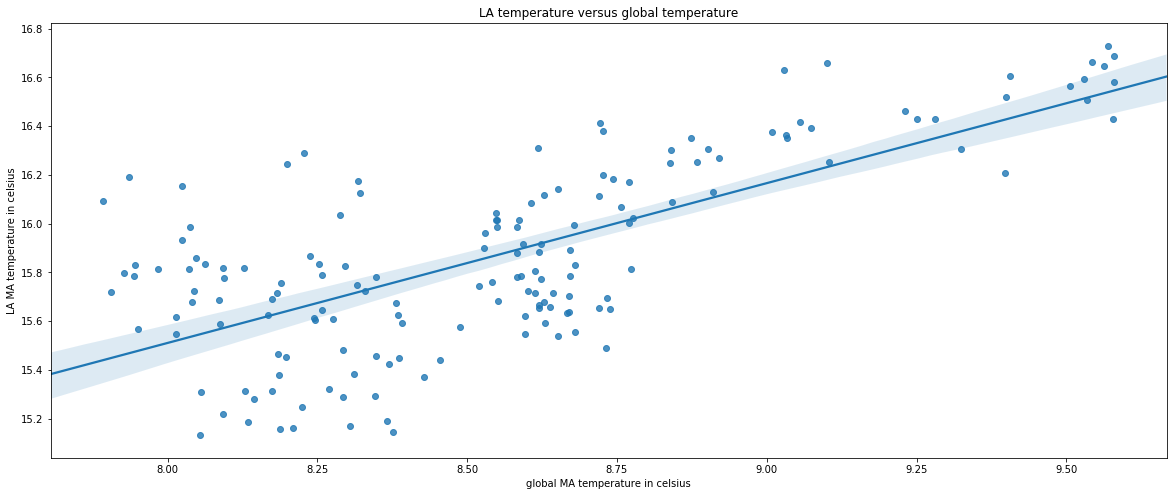

In [101]:
plt.figure(figsize=(20, 8))
ax = sns.regplot(x="global_ma5_temp", y="LA_ma5_temp", data=data)
ax.set(xlabel='global MA temperature in celsius', ylabel='LA MA temperature in celsius', title = 'LA temperature versus global temperature');

In [97]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(data['global_ma5_temp'].values, data['LA_ma5_temp'].values)

In [98]:
pearson_coef

0.7093750818103

In [99]:
np.polyfit(data['global_ma5_temp'].values, data['LA_ma5_temp'].values, 1)

array([ 0.65570147, 10.2644381 ])

In [3]:
-5269 + 8413*1.5 + 158.1*3 + 454*5

10094.8

In [6]:
df1 = pd.read_csv('/Users/Zhenyue/Downloads/existing.csv')
df2 = pd.read_csv('/Users/Zhenyue/Downloads/prediction.csv')

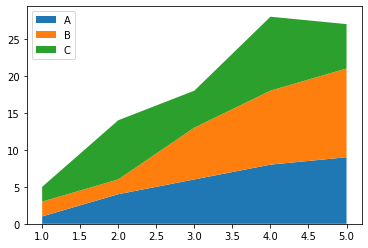

In [29]:
x=range(1,6)
y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]
 
# Plot
plt.stackplot(x,y, labels=['A','B','C'])
plt.legend(loc='upper left')
plt.show()


In [35]:
df1['Month'] = df1['Month'].astype(str)
df1['Year'] = df1['Year'].astype(str)

In [37]:
df1['date'] = df1['Month'] + '/' + df1['Year']
df1['date'] = pd.to_datetime(df1['date'])
df1.head()

,Year,Month,Sum_Produce,date
0,2012,3,25151525.84,2012-03-01
1,2012,4,24406048.39,2012-04-01
2,2012,5,28249539.01,2012-05-01
3,2012,6,28691364.32,2012-06-01
4,2012,7,28535707.45,2012-07-01


In [39]:
df2.head()

,new_store,existing_store,year,month
0,2588356.558,21829060.03,2016,1
1,2498567.174,21146329.63,2016,2
2,2919067.025,23735686.94,2016,3
3,2797280.083,22409515.28,2016,4
4,3163764.859,25621828.73,2016,5


In [42]:
df2['month'] = df2['month'].astype(str)
df2['year'] = df2['year'].astype(str)
df2['date'] = df2['month'] + '/' + df2['year']
df2['date'] = pd.to_datetime(df2['date'])
df2.head()

,new_store,existing_store,year,month,date
0,2588356.558,21829060.03,2016,1,2016-01-01
1,2498567.174,21146329.63,2016,2,2016-02-01
2,2919067.025,23735686.94,2016,3,2016-03-01
3,2797280.083,22409515.28,2016,4,2016-04-01
4,3163764.859,25621828.73,2016,5,2016-05-01


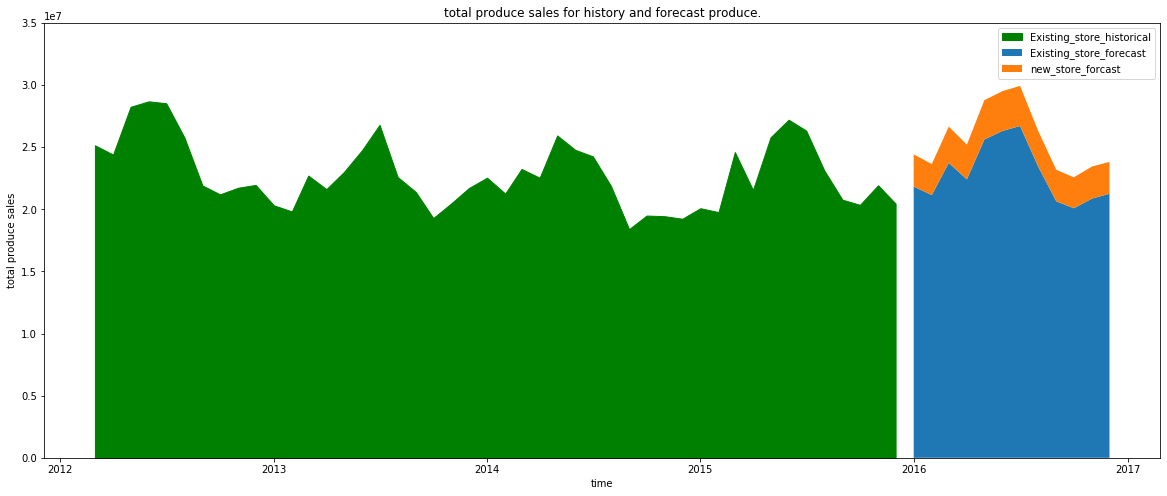

In [57]:
plt.figure(figsize=(20, 8))
plt.ylim((0, 3.5e7))
plt.xlabel('time')
plt.ylabel('total produce sales')
plt.title('total produce sales for history and forecast produce.')
plt.fill_between(df1['date'], df1['Sum_Produce'], label = 'Existing_store_historical', color='green');
plt.stackplot(df2['date'], df2[['existing_store', 'new_store']].values.T, labels=['Existing_store_forecast','new_store_forcast'])
plt.legend(loc='upper right')
plt.show()